## Reddit-postausten datan hakeminen 
Pushshift API ja sille tehty python wrapper psaw

In [1]:
from psaw import PushshiftAPI
import pandas as pd

#hakuparametrejä
after = "2021-10-01" 
before = "2021-11-15" 
subreddit = "wallstreetbets" 
q = "" 

#rajapinnan initialisointi
api = PushshiftAPI()

#haku pushshift apin postausten (submission) endpointiin annetuilla hakuparametreilla
request = api.search_submissions(q=q, subreddit=subreddit, after=after, before=before)

#postaukset loopataan läpi ja tungetaan pandas taulukkoon Mitä enemmän dataa haetaan, sitä kauemmin kestää.
df = pd.DataFrame([submission.d_ for submission in request]) 

#syntyneen taulukon "muoto" eli rivien ja sarakkeiden lukumäärä
df.shape 

(41260, 88)

Palkkikaavio kerättyjen postausten flairien määristä.

<AxesSubplot:xlabel='count', ylabel='link_flair_text'>

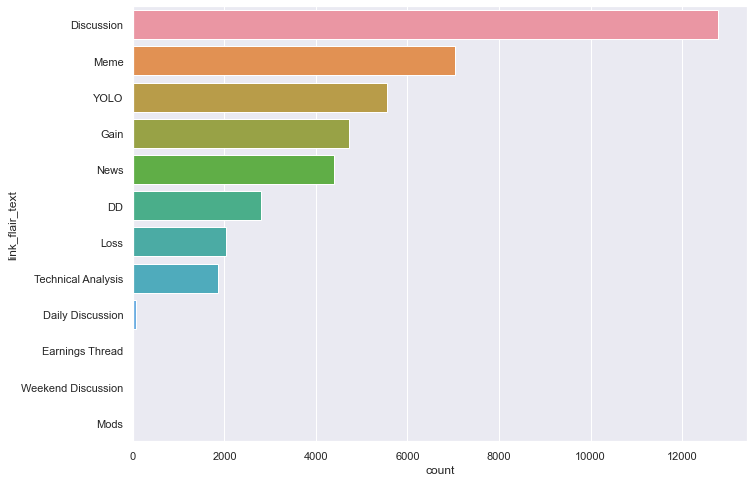

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8)})

sns.countplot(data=df, y='link_flair_text', order=df['link_flair_text'].value_counts().index)


In [9]:
df['link_flair_text'].value_counts()

Discussion            12776
Meme                   7039
YOLO                   5552
Gain                   4711
News                   4396
DD                     2804
Loss                   2025
Technical Analysis     1859
Daily Discussion         62
Earnings Thread           9
Weekend Discussion        7
Mods                      5
Name: link_flair_text, dtype: int64

In [6]:
df.link_flair_text.isna().sum()

15